**Importing Modules and Dataset Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('ENB_data.csv')
print(data.head())


     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


**1)**

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


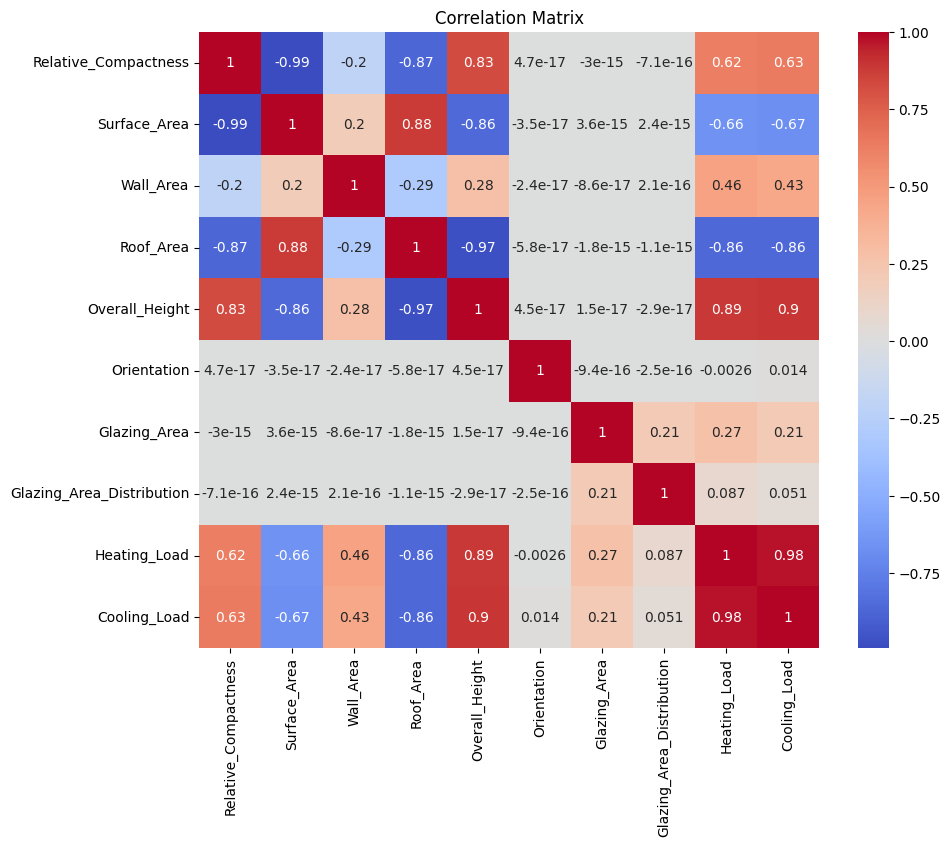

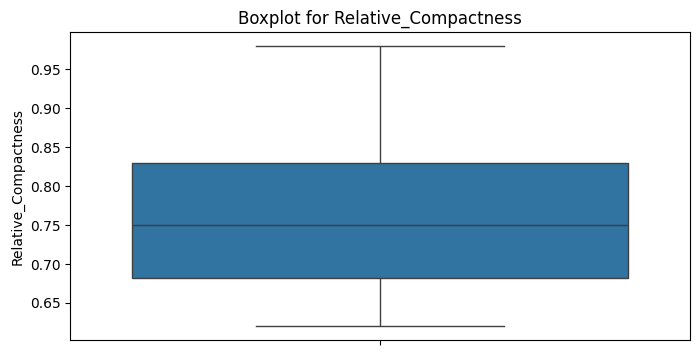

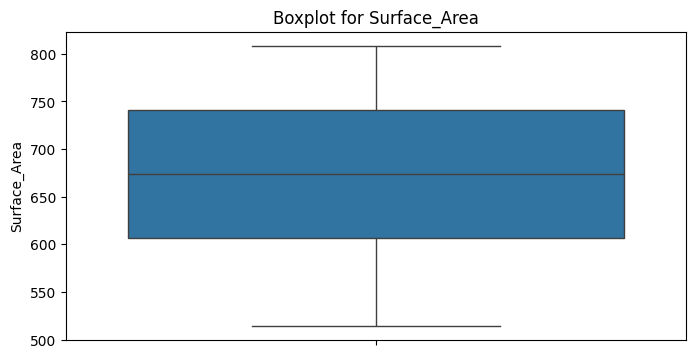

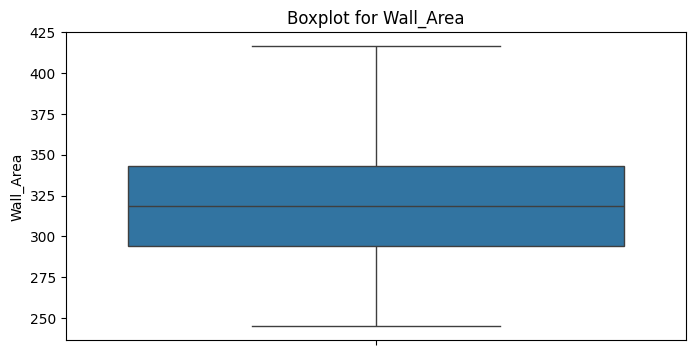

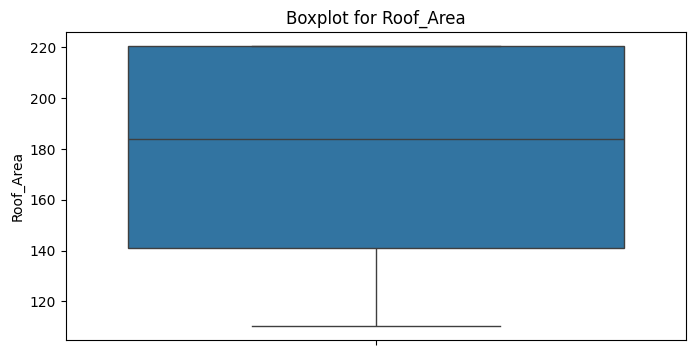

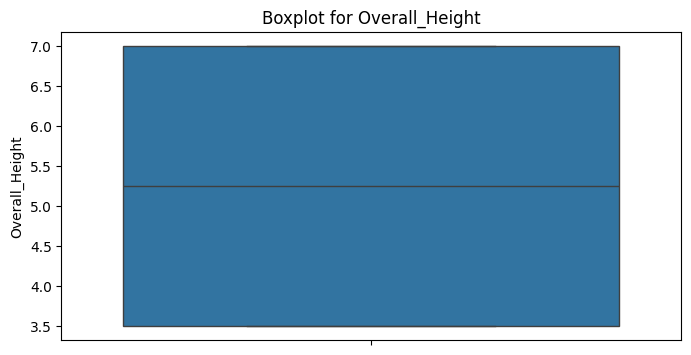

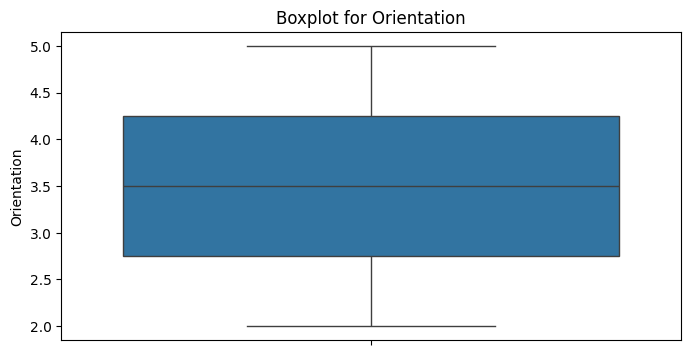

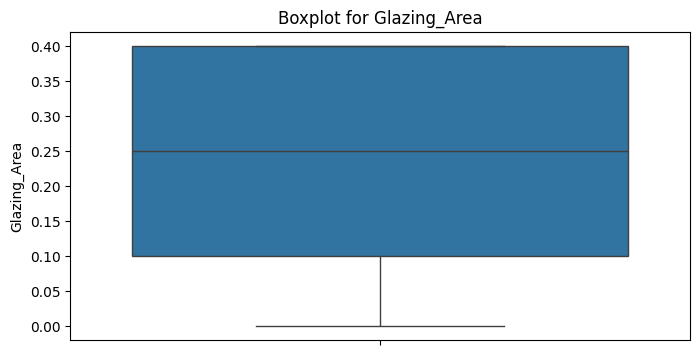

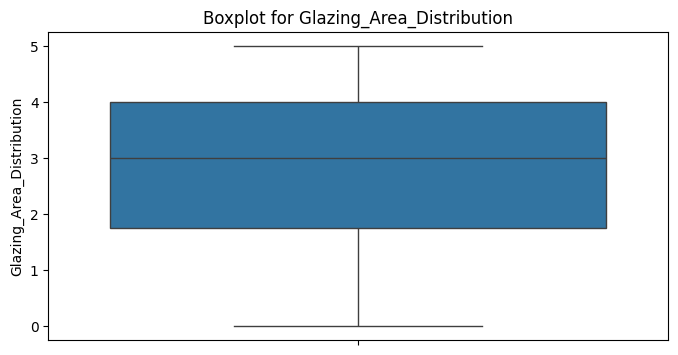

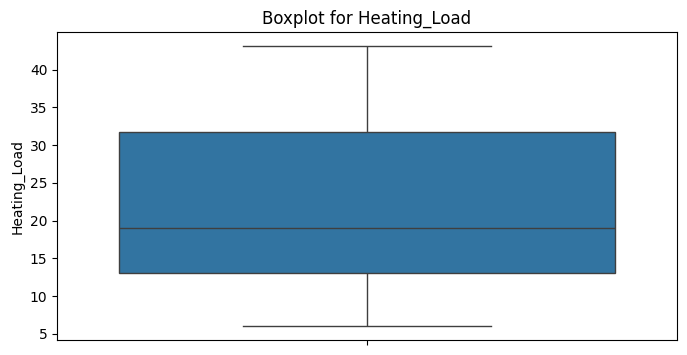

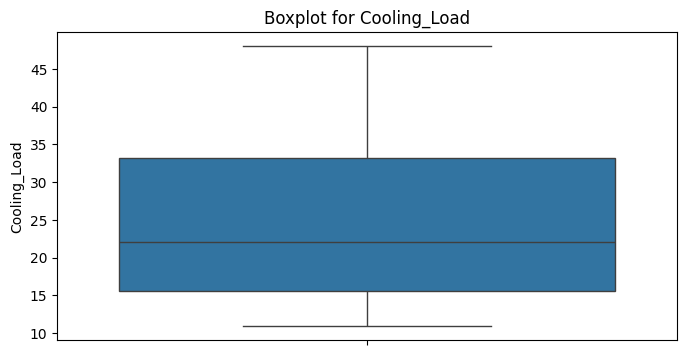

In [2]:
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
                'Overall_Height', 'Orientation', 'Glazing_Area', 
                'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

print(data.isnull().sum())

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

for column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


**2)**

In [3]:
X = data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 
          'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y = data['Heating_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**3) Multivariate Linear Regression**

In [4]:
from sklearn.preprocessing import StandardScaler
X = data.iloc[:, :-2]  
y = data.iloc[:, -2] 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_manual = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_manual = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

theta = np.linalg.inv(X_train_manual.T @ X_train_manual) @ X_train_manual.T @ y_train

y_pred_manual = X_test_manual @ theta

r2_manual = r2_score(y_test, y_pred_manual)
mse_manual = mean_squared_error(y_test, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)

print(f"Manual Linear Regression R² Score: {r2_manual:.4f}")
print(f"Manual Linear Regression MSE: {mse_manual:.4f}")
print(f"Manual Linear Regression RMSE: {rmse_manual:.4f}")


Manual Linear Regression R² Score: 0.8965
Manual Linear Regression MSE: 10.7841
Manual Linear Regression RMSE: 3.2839


In [5]:
# Linear Regression using sklearn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


**4) Model Evaluation**

Sklearn Linear Regression - R2 Score: 0.9122, MSE: 9.1532, RMSE: 3.0254
Ridge Regression - R2 Score: 0.9074, MSE: 9.6535, RMSE: 3.1070
Lasso Regression - R2 Score: 0.9032, MSE: 10.0890, RMSE: 3.1763


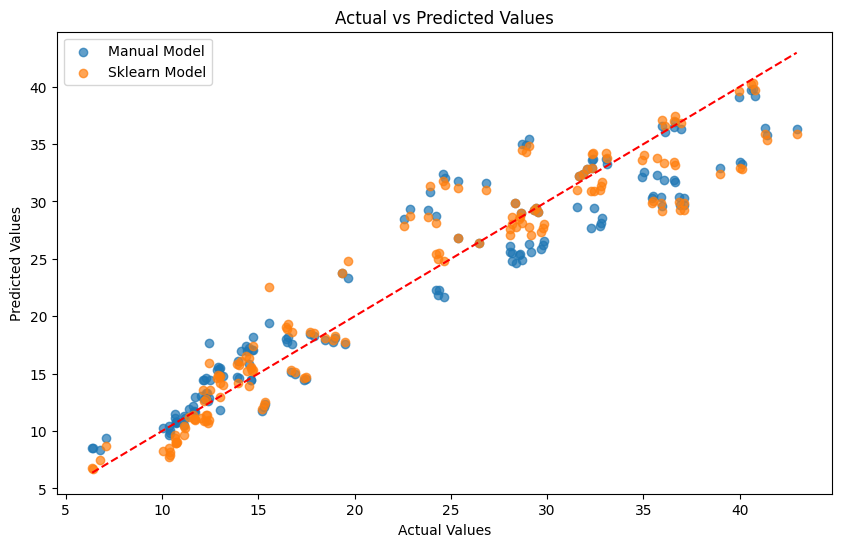

In [6]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} - R2 Score: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    return r2, mse, rmse
    
evaluate_model(y_test, y_pred_lr, "Sklearn Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_manual, label="Manual Model", alpha=0.7)
plt.scatter(y_test, y_pred_lr, label="Sklearn Model", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()


**5)**

In [7]:
weights = lr_model.coef_
features = X.columns
feature_weights = list(zip(features, weights))
sorted_features = sorted(feature_weights, key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance (sorted by impact on Heating Load):")
for name, weight in sorted_features:
    print(f"{name}: {weight:.4f}")


Feature Importance (sorted by impact on Heating Load):
Relative_Compactness: -61.8734
Glazing_Area: 20.1432
Overall_Height: 4.1237
Glazing_Area_Distribution: 0.2111
Surface_Area: -0.0601
Roof_Area: -0.0488
Wall_Area: 0.0376
Orientation: -0.0324


**Suggestions**

1)Use high-performance materials like foam or thermal barriers for walls

2)Maximize sunlight exposure in winter, block cold winds

3)Incorporate solar panels or geothermal heating.